In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [120]:
#Load Data set
shopping = pd.read_csv('Online+Retail.csv')

In [121]:
shopping.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [122]:
shopping.shape

(541909, 8)

In [123]:
null = shopping.isnull().sum()
null

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [124]:
#Null percentage
null_p = (shopping.isnull().sum()/shopping.shape[0])*100
null_p

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [125]:
#As we cannot drop customer data i.e. customer ID we simply drop null rows
shopping = shopping[~(shopping['CustomerID'].isnull())]

In [126]:
#Checking percentage again
null_p = (shopping.isnull().sum()/shopping.shape[0])*100
null_p

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [127]:
shopping.shape

(406829, 8)

In [128]:
#Checking for data types
shopping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [129]:
#Data Preparation for modelling
#As we know that we need 3 measures for custering i.e. 1. Recency 2. Frequency 3. Monetory

In [130]:
shopping['Amount'] = shopping['Quantity'] * shopping['UnitPrice']

In [131]:
shopping.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [132]:
#We need to group all same customer ID to get total amount spent by customer
# Monetory
group_cust = shopping.groupby('CustomerID')['Amount'].sum()
group_cust = group_cust.reset_index()
group_cust.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [133]:
#Frequency
# TO get frequency of transaction we need to count no of invoices of customer
frequency = shopping.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [134]:
#Merge the above two data frames
grouped_df = pd.merge(group_cust,frequency, on= 'CustomerID', how= 'inner')

In [135]:
grouped_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [136]:
# Recency
# As InvoiceDate column type is object we need to convert them in date-time format
shopping['InvoiceDate'] = pd.to_datetime(shopping['InvoiceDate'], format = "%d-%m-%Y %H:%M")
shopping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [137]:
shopping.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [138]:
#Compute max of date
max_date = max(shopping['InvoiceDate'])

In [139]:
max_date

Timestamp('2011-12-09 12:50:00')

In [140]:
# Computing diff between max date and invoice date
shopping['diff_date'] = max_date - shopping['InvoiceDate']

In [141]:
shopping.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [142]:
#Create Recency
recency = shopping.groupby('CustomerID')['diff_date'].min()

In [143]:
recency = recency.reset_index()

In [144]:
recency.head()

,CustomerID,diff_date
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [145]:
# merging this column to Grouped data freame
grouped_df = pd.merge(grouped_df,recency, on = 'CustomerID', how = 'inner')

In [146]:
grouped_df.columns = ['CustomerID','Amount','Frequency','Recency']

In [147]:
grouped_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [148]:
# We need only number of days in Recency column
import datetime as dt

In [149]:
grouped_df['Recency'] = grouped_df['Recency'].dt.days

In [150]:
grouped_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


<AxesSubplot:xlabel='Amount'>

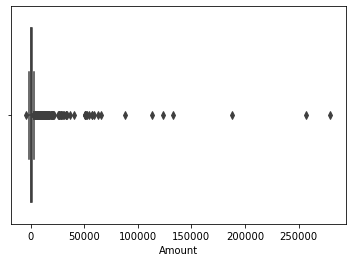

In [151]:
#Checking for outliers as outliers affect overall cluster formation
sns.boxplot(grouped_df['Amount'])

<AxesSubplot:xlabel='Frequency'>

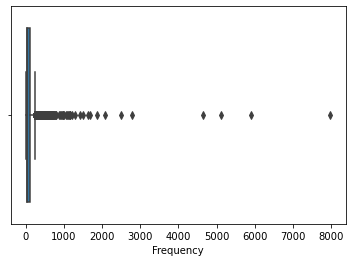

In [152]:
sns.boxplot(grouped_df['Frequency'])

<AxesSubplot:xlabel='Recency'>

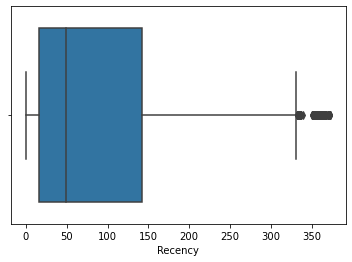

In [153]:
sns.boxplot(grouped_df['Recency'])

In [154]:
#There are some outliers but not removing them as outlier treatment is depend upon business problem

In [155]:
#Rescaling of nuerical values
rfm_df = grouped_df[['Recency','Frequency','Amount']]
rfm_df.head()

,Recency,Frequency,Amount
0,325,2,0.00
1,1,182,4310.00
2,74,31,1797.24
3,18,73,1757.55
4,309,17,334.40


In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

In [157]:
#Check for Hopkins test to check whether data has meaniningfl clusters or not
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [158]:
rfm_scaled = pd.DataFrame(rfm_scaled)

In [159]:
rfm_scaled.columns = [['Recency','Frequency','Amount']]

In [160]:
hopkins(rfm_scaled)

0.9966511135670089

In [161]:
#Modeling
from sklearn.cluster import KMeans

In [162]:
kmeans = KMeans(n_clusters= 4 , max_iter= 50)

In [163]:
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [164]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0])

In [165]:
#Finding optimal number of clusters using Sum of Squared Distances
ssd = []
n_clusters = [2,3,4,5,6,7,8]
for i in n_clusters:
    kmeans = KMeans(n_clusters= i , max_iter= 50)
    kmeans.fit(rfm_scaled)
    ssd.append(kmeans.inertia_)

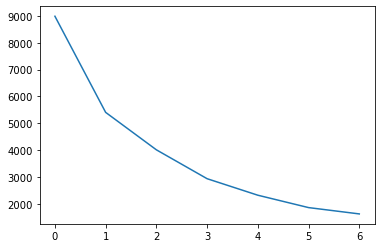

In [166]:
#Plotting this ssd
plt.plot(ssd)
#As we can see in graph (Elbow curve) after 3 clusters the rate of drop is not significant

In [167]:
#Silhouette method
from sklearn.metrics import silhouette_score

In [168]:
n_clusters = [2,3,4,5,6,7,8]
for i in n_clusters:
    kmeans = KMeans(n_clusters= i , max_iter= 50)
    kmeans.fit(rfm_scaled)

    cluster_labels = kmeans.labels_
    sil_avg = silhouette_score(rfm_scaled,cluster_labels)
    print('For n_cluster = {0}, the silhouette score = {1}'.format(i,sil_avg))

For n_cluster = 2, the silhouette score = 0.9344641162235822
For n_cluster = 3, the silhouette score = 0.6003883114752382
For n_cluster = 4, the silhouette score = 0.5981422039499412
For n_cluster = 5, the silhouette score = 0.6160424337273476
For n_cluster = 6, the silhouette score = 0.5856955818362631
For n_cluster = 7, the silhouette score = 0.5240032228884556
For n_cluster = 8, the silhouette score = 0.5080485403834952


In [169]:
#Here we can see the silhouette score for n_clusters for 2 is very good but on business point of view 2 customer segment is not optimal
# So As per the elbow curve and Silhouette score the optimal number of cluster is 3

In [170]:
#Final model with K = 3
kmeans = KMeans(n_clusters= 3 , max_iter= 50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [171]:
labels =kmeans.labels_
labels

array([1, 0, 0, ..., 0, 0, 0])

In [172]:
#Assign labels to customer ID
grouped_df['cluster_id'] = labels

In [173]:
grouped_df.head()

,CustomerID,Amount,Frequency,Recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


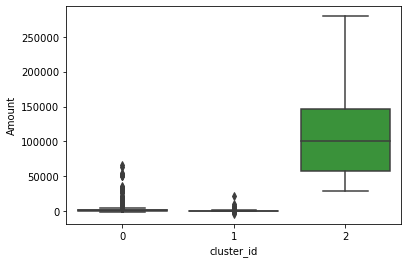

In [174]:
#Evaluation of clusters
# Plotting
sns.boxplot(x='cluster_id',y='Amount',data=grouped_df)
plt.show()
#Here we can see the cluster2 has more number of cutomers than two other clusters

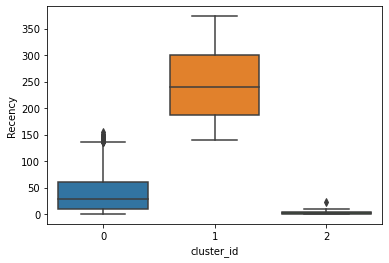

In [175]:
#For Recency
sns.boxplot(x='cluster_id',y='Recency',data=grouped_df)
plt.show()
#Here we can see there are more recency in cluster0 and cluster1 than cluster2

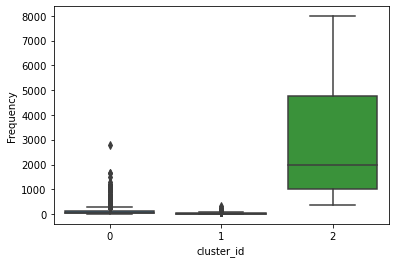

In [176]:
#For Frequency
sns.boxplot(x='cluster_id',y='Frequency',data=grouped_df)
plt.show()
# Here we can see cluster2 have more frequency than other two clusters